In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import color, transform, filters
import cv2

load images

In [2]:
image_1 = cv2.imread('Dom1.jpg')
image_1_gray = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
image_2 = cv2.imread('Dom2.jpg')
image_2_gray = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

plot images

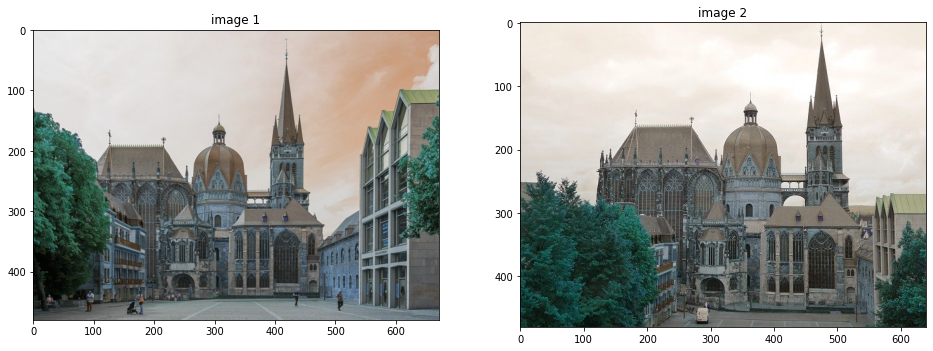

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(16,10))
axes = axes.flat
axes[0].imshow(image_1)
axes[0].set_title('image 1')
axes[1].imshow(image_2)
axes[1].set_title('image 2')
plt.show()

keypoint detection

In [4]:
sift = cv2.SIFT_create(nOctaveLayers=4, contrastThreshold=0.04, edgeThreshold=10)
kp1, des1 = sift.detectAndCompute(image_1_gray, None)
kp2, des2 = sift.detectAndCompute(image_2_gray, None)

keypoint visualization

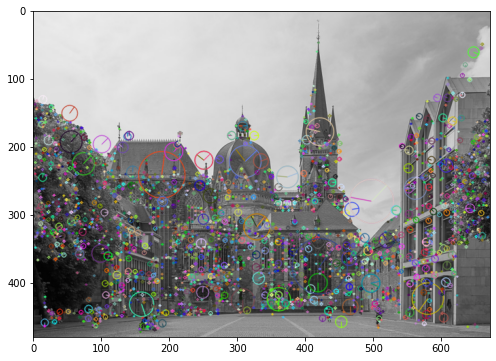

In [6]:
ft = cv2.drawKeypoints(image_1_gray, kp1, None,
                       flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[10, 6])
plt.imshow(ft)
plt.show()

In [10]:
def ratio_test(ratio, matches):
    good = []
    for m, n in matches:
        if m.distance < ratio*n.distance: # If so, preserve this match
            good.append([m])
    return good

matching

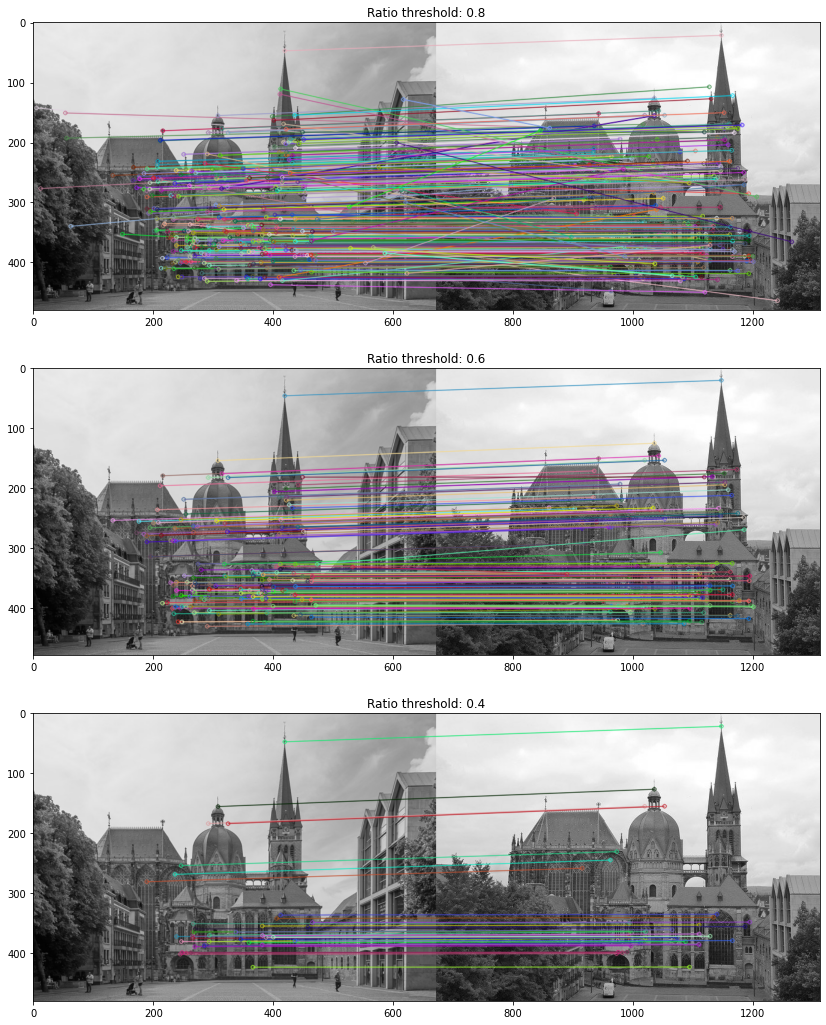

In [13]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

ratio_thresh = [0.8, 0.6, 0.4]

fig, axes = plt.subplots(len(ratio_thresh), 1, figsize=[24, 18])
axes = axes.flat
for i in np.arange(len(ratio_thresh)):
    # Apply ratio test
    good_matches = ratio_test(ratio_thresh[i], matches)
    
    # cv2.drawMatchesKnn expects list of lists as matches
    # flags=2: Single keypoints will not be drawn
    im_match = cv2.drawMatchesKnn(image_1_gray, kp1, image_2_gray, kp2,
                                  good_matches, None, flags=2)
    axes[i].imshow(im_match)
    axes[i].set_title('Ratio threshold: '+str(ratio_thresh[i]))
plt.show()